In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 100)

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_style('whitegrid')


set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [86]:
df = pd.read_csv("아킬레스건1.csv")

# 작업해줘야할 것

1. 자정을 넘어가는, 혹은 넘기고 한 작업은 전날 완료한 걸로 포섭해야한다.
2. 회차당 걸린 시간을 잰다. 이건 1번 작업 후 시작시와 끝시 간의 타임델타를 해야한다.
3. 어느 시간대에 가장 활발히 했는지를 빈도로 조사한다.
4. 완성 / 전체 날짜 비율을 계산한다.

In [87]:
df = df[['entry_type', 'entry_date', 'entry_timestamp']]

In [88]:
df.columns = ['type', 'date', 'timestamp']

In [89]:
df['timestamp'] = df['timestamp'].str.replace("T"," ")

In [90]:
df['timestamp'] = df['timestamp'].str.split("+").str[0]

In [92]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [93]:
df['date_datetime'] = df[['date']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[0:4], s[4:6],s[6:]))

In [94]:
df

,type,date,timestamp,date_datetime
0,completed_manually_partial,20200306,2020-03-06 10:49:03,2020-03-06
1,completed_manually_partial,20200306,2020-03-06 16:51:29,2020-03-06
2,missed_auto,20200306,2020-03-07 11:22:57,2020-03-06
3,completed_manually_partial,20200307,2020-03-07 11:22:55,2020-03-07
4,completed_manually_partial,20200307,2020-03-07 11:22:56,2020-03-07
5,completed_manually_partial,20200307,2020-03-07 11:58:46,2020-03-07
6,completed_manually_partial,20200307,2020-03-07 17:33:15,2020-03-07
7,completed_manually_partial,20200307,2020-03-07 22:09:41,2020-03-07
8,missed_auto,20200307,2020-03-08 13:25:11,2020-03-07
9,completed_manually_partial,20200308,2020-03-08 13:26:41,2020-03-08


In [95]:
df['date_datetime'] = pd.to_datetime(df['date_datetime'])


In [96]:
from datetime import datetime, timedelta



In [97]:
# 사실 streak 서비스가 해준건데...

#df.loc[df['timestamp'].dt.hour<5, 'date_datetime'] = df.loc[df['timestamp'].dt.hour<5, 'date_datetime'] - timedelta(days=1)  # 새벽 5시 안으로 한 스트레칭은 전날 한 스트레칭으로 포섭시켰다.
    
#    today + datetime.timedelta(days=10)

In [98]:
# 낮에 했는지 밤에 했는지 여부 파악

#df['time_only'] = df['timestamp'].astype(str).str[-8:]

In [99]:
df['count'] = df['date_datetime']  # 일단 공갈  칼럼 하나 만듦

In [100]:
df = df.loc[~(df['type'] == 'missed_auto')]

In [101]:
df['count'] = 0

In [102]:
df.loc[df['date_datetime'] != df['date_datetime'].shift(+1), 'count'] = 1

In [103]:
for i in range(df.shape[0]):
    if df.iloc[i, -1] == 0:
        df.iloc[i,-1] = df.iloc[i - 1,-1] + 1

In [104]:
df['duration'] = 0

In [111]:
for i in range(df.shape[0]):
    if df.iloc[i,-2] == 5:
        count_five_index = i
        
        for j in range(1,6):
            if df.iloc[count_five_index - j, -2] == 1:
                df.iloc[i, -1] = df.iloc[i,-4] - df.iloc[count_five_index - j, -4]

In [112]:
df

,type,date,timestamp,date_datetime,count,duration
0,completed_manually_partial,20200306,2020-03-06 10:49:03,2020-03-06,1,0
1,completed_manually_partial,20200306,2020-03-06 16:51:29,2020-03-06,2,0
3,completed_manually_partial,20200307,2020-03-07 11:22:55,2020-03-07,1,0
4,completed_manually_partial,20200307,2020-03-07 11:22:56,2020-03-07,2,0
5,completed_manually_partial,20200307,2020-03-07 11:58:46,2020-03-07,3,0
6,completed_manually_partial,20200307,2020-03-07 17:33:15,2020-03-07,4,0
7,completed_manually_partial,20200307,2020-03-07 22:09:41,2020-03-07,5,0 days 10:46:46
9,completed_manually_partial,20200308,2020-03-08 13:26:41,2020-03-08,1,0
10,completed_manually_partial,20200308,2020-03-08 18:01:31,2020-03-08,2,0
11,completed_manually_partial,20200308,2020-03-08 18:01:32,2020-03-08,3,0


In [117]:
df.loc[df['duration'] != 0, 'duration']

7        0 days 10:46:46
20       0 days 06:21:34
25       0 days 00:07:51
30       0 days 00:07:32
35       0 days 00:08:05
40       0 days 00:05:45
45       0 days 00:07:35
51       0 days 00:08:46
56       0 days 00:15:03
61       0 days 00:07:40
66       0 days 00:08:31
71       0 days 00:05:38
76       0 days 00:07:27
81       0 days 00:07:59
86       0 days 00:05:47
91       0 days 00:07:49
96       0 days 00:06:47
101      0 days 00:05:57
106      0 days 00:06:07
111      0 days 00:07:36
116      0 days 00:08:16
121      0 days 00:06:14
126      0 days 00:08:28
131      0 days 00:06:56
136      0 days 00:07:54
141      0 days 00:08:53
146      0 days 00:08:21
151      0 days 00:20:16
157      0 days 00:08:00
162      0 days 00:07:31
167      0 days 00:07:57
172      0 days 00:07:09
178      0 days 00:05:55
183      0 days 00:06:09
188      0 days 00:05:44
193      0 days 00:05:57
198      0 days 00:11:08
204      0 days 00:07:56
209      0 days 00:06:34
214      0 days 00:11:58


In [36]:
#df = df.drop('date', axis=1)

In [53]:
df['complete'] = df['type']

In [56]:
df.loc[df['type'] == "completed_manually", 'complete'] = 1
df.loc[df['type'] == "completed_manually_partial", 'complete'] = 1
#df.loc[~(df['type'] == "completed_manually"), 'complete'] = 0

In [63]:
df['time_only'] = df['time_only'].str[:2]

In [68]:

df['time_only'] = df['time_only'].astype(int)

In [73]:
df['date'] = df['date'] - 20200000

<Figure size 360000x648 with 0 Axes>

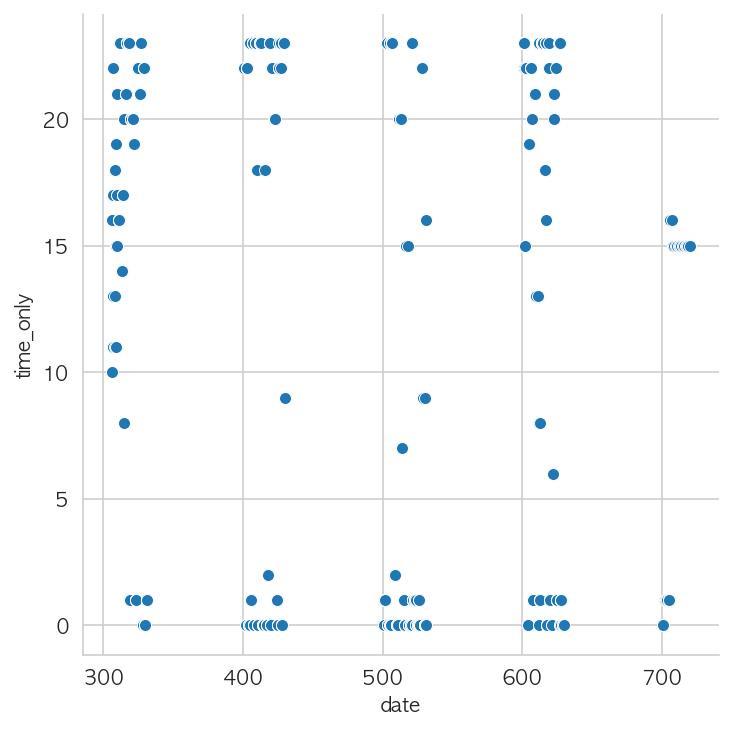

<Figure size 360000x648 with 0 Axes>

In [81]:
# 대충 20시~ 23시 사이에 많이 분포. 1시도 많음
sns.relplot(x="date", y="time_only", data=df)


In [221]:
df['duration'] = df['complete']


In [246]:
df['timestamp'][1] - df['timestamp'][0]

Timedelta('0 days 06:02:26')

In [225]:
# 스트레칭 완료한 데이터 인덱스 빼오기

complete_index_list = df.loc[df['type'] == "completed_manually"].index

In [255]:
# 스트레칭에 걸리는 시간 계산

for index in complete_index_list:
    duration_minute = (df.iloc[index, 1] - df.iloc[index - 4, 1]).total_seconds() / 60
    df.iloc[index, -1] = duration_minute

In [262]:
# 쓸데없는 처음, 끝부분 날짜의 데이터 삭제

df = df.iloc[20:543]

In [265]:
# 아킬레스건 스트레칭 챙기는 비율

df.loc[~(df['type'] == "completed_manually_partial")]['complete'].mean()

0.775

In [270]:
# 스트레칭 1차 평균 걸리는 시간

df.loc[(df['complete'] == 1) & (df['duration'] < 10)]['duration'].mean()

7.048444444444445